Soluzione trovata con A* Search:
Azioni: ['Right', 'Right', 'Right', 'Right', 'Down', 'Down', 'Down', 'Down']
Costo del percorso: 8


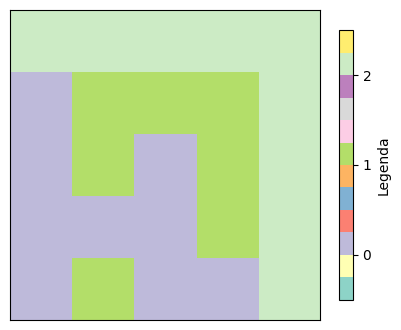


Soluzione trovata con Breadth-First Search:
Azioni: ['Down', 'Down', 'Down', 'Right', 'Right', 'Down', 'Right', 'Right']
Costo del percorso: 8


In [1]:
# Import delle librerie
import numpy as np
from aima.search import Problem, astar_search, breadth_first_tree_search
import matplotlib.pyplot as plt

# Definizione della classe TreasureMaze
class TreasureMaze(Problem):
    def __init__(self, initial, goal, maze):
        super().__init__(initial, goal)
        self.maze = maze
        self.rows = maze.shape[0]
        self.cols = maze.shape[1]
            
    def actions(self, state):
        actions = []
        x, y = state
        directions = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}
        for action, (dx, dy) in directions.items():
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.rows and 0 <= new_y < self.cols:
                if self.maze[new_x][new_y] != 1:
                    actions.append(action)
        return actions
            
    def result(self, state, action):
        x, y = state
        if action == 'Up':
            return (x - 1, y)
        elif action == 'Down':
            return (x + 1, y)
        elif action == 'Left':
            return (x, y - 1)
        elif action == 'Right':
            return (x, y + 1)
        else:
            return state
           
    def goal_test(self, state):
        return state == self.goal
        
    def h(self, node):
        x1, y1 = node.state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

# Funzioni ausiliarie
def get_path(initial_state, actions, problem):
    state = initial_state
    path = [state]
    for action in actions:
        state = problem.result(state, action)
        path.append(state)
    return path

def visualize_maze(maze, path):
    maze_visual = maze.copy()
    for position in path:
        x, y = position
        if maze_visual[x][y] != 0:
            continue
        maze_visual[x][y] = 2

    plt.figure(figsize=(5,5))
    cmap = plt.cm.Set3
    plt.imshow(maze_visual, cmap=cmap)
    cbar = plt.colorbar(ticks=[0,1,2], label='Legenda', shrink=0.7)
    cbar.ax.set_yticklabels(['Libero', 'Ostacolo', 'Percorso'])
    plt.clim(-0.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Labirinto e stati
maze = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
])

initial_state = (0, 0)
goal_state = (4, 4)

# Creazione del problema
problem = TreasureMaze(initial_state, goal_state, maze)

# Risoluzione con A* Search
solution_node = astar_search(problem)

if solution_node:
    actions = solution_node.solution()
    print("Soluzione trovata con A* Search:")
    print("Azioni:", actions)
    print("Costo del percorso:", solution_node.path_cost)
    path = get_path(initial_state, actions, problem)
    visualize_maze(maze, path)
else:
    print("Nessuna soluzione trovata con A* Search.")

# Risoluzione con Breadth-First Search
solution_node_bfs = breadth_first_tree_search(problem)

if solution_node_bfs:
    actions_bfs = solution_node_bfs.solution()
    print("\nSoluzione trovata con Breadth-First Search:")
    print("Azioni:", actions_bfs)
    print("Costo del percorso:", solution_node_bfs.path_cost)
else:
    print("Nessuna soluzione trovata con Breadth-First Search.")